In [1]:
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch
import pandas as pd

from bms.dataset import BMSDataset, collate_fn
from bms.transforms import get_transforms

In [2]:
data_csv = pd.read_pickle('/workdir/data/processed/train_labels_processed.pkl')
data_csv_len = data_csv.shape[0] - 1                                        
train_data_size = int(0.8*data_csv_len)
data_csv_train = data_csv.iloc[:train_data_size,:]                          
data_csv_val = data_csv.iloc[train_data_size:,:]                            

train_transform = get_transforms((224, 224))                                
val_transform = get_transforms((224, 224))                                  
train_dataset = BMSDataset(                                                 
    data_csv=data_csv_train,                                                
    restrict_dataset_len=50,
    transform=train_transform                                               
)                                                                           
train_loader = torch.utils.data.DataLoader(                                 
    dataset=train_dataset,                                                  
    batch_size=20,                                             
    num_workers=0,
    collate_fn=collate_fn
)                                                                           
val_dataset = BMSDataset(                                                   
    data_csv=data_csv_val,                                                  
    transform=val_transform                                                 
)                                                                           
val_loader = torch.utils.data.DataLoader(                                   
    dataset=val_dataset,                                                    
    batch_size=20,                                             
    num_workers=0,
    collate_fn=collate_fn
)                  

1939347 1390390


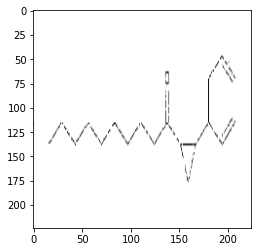

In [32]:
plt.imshow(train_dataset[1][0].permute(1,2,0))
# plt.imshow(train_dataset[150][0])
plt.show()

In [ ]:
for i in val_loader:
    print(i[3])
    break